In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [2]:
# Load data
data = pd.read_csv('/kaggle/input/spamemaildata/spam.csv')
data['Spam'] = data['Category'].apply(lambda x: 1 if x == 'spam' else 0)

In [3]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(data['Message'], data['Spam'], test_size=0.25, random_state=42)

In [4]:
# Tokenize text
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [5]:
# Pad sequences for uniform length
max_len = 100  # Truncate or pad all sequences to this length
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

In [6]:
# Build LSTM model 
model = Sequential([
    Embedding(input_dim=5000, output_dim=64), 
    LSTM(64, return_sequences=False),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [7]:
# Train
history = model.fit(
    X_train_padded, y_train,
    epochs=10,
    validation_data=(X_test_padded, y_test),
    batch_size=64
)

Epoch 1/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - accuracy: 0.8300 - loss: 0.4918 - val_accuracy: 0.8665 - val_loss: 0.4005
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.8713 - loss: 0.4063 - val_accuracy: 0.8665 - val_loss: 0.3933
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.8623 - loss: 0.4206 - val_accuracy: 0.8665 - val_loss: 0.3945
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.8715 - loss: 0.4044 - val_accuracy: 0.8665 - val_loss: 0.3941
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.8572 - loss: 0.4239 - val_accuracy: 0.8665 - val_loss: 0.3950
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.8659 - loss: 0.4097 - val_accuracy: 0.8665 - val_loss: 0.3932
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.8580 - loss: 0.4276 - val_accuracy: 0.8665 - val_loss: 0.3937
Epoch 8/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.8652 - loss: 0.4062 - val_accuracy: 0.8665 - v

In [8]:
# Evaluate
test_loss, test_acc = model.evaluate(X_test_padded, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8766 - loss: 0.3744
Test Accuracy: 86.65%


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1207
           1       1.00      0.00      0.00       186

    accuracy                           0.87      1393
   macro avg       0.93      0.50      0.46      1393
weighted avg       0.88      0.87      0.80      1393


Confusion Matrix:
[[1207    0]
 [ 186    0]]


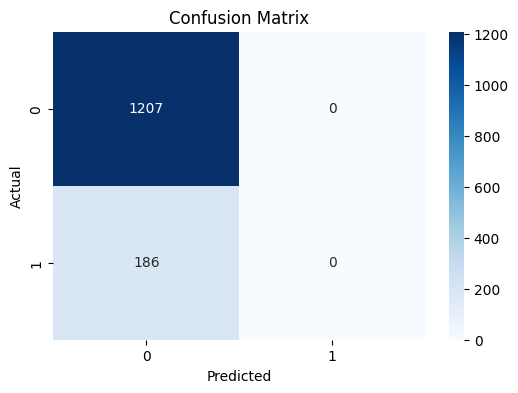

In [10]:
# === 6. Classification Report & Confusion Matrix ===
y_pred_probs = model.predict(X_test_padded)
y_pred = (y_pred_probs > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

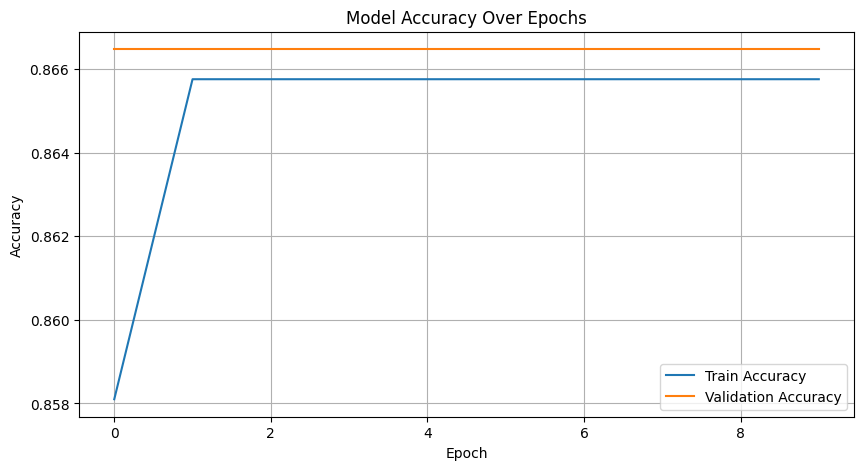

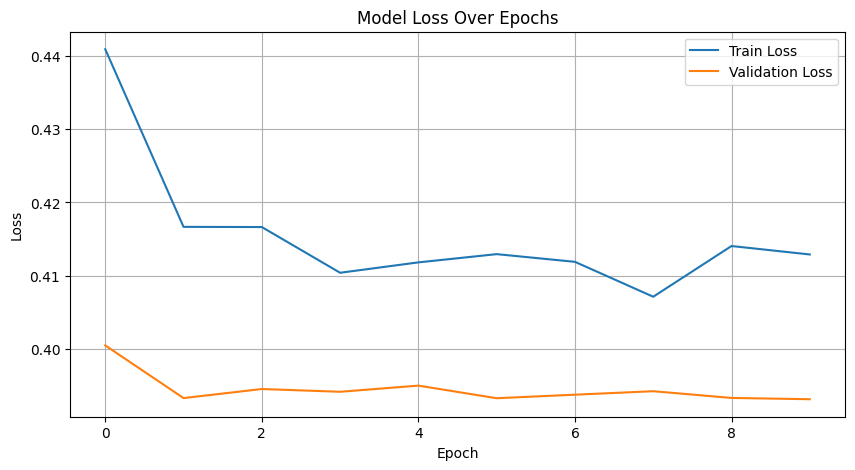

In [11]:
# === 7. Plot Training History ===

# Accuracy Plot
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss Plot
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()